In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import cv2
import os
import PIL

In [3]:
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir='.',untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir=pathlib.Path(r'datasets\flower_photos\flower_photos')
#data_dir="datasets\flower_photos\flower_photos"

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))

In [7]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

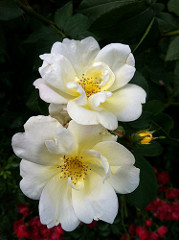

In [8]:
PIL.Image.open(str(roses[0]))

In [9]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [10]:
#flowers_images_dict['roses']

In [11]:
sunflower=list(data_dir.glob('sunflowers/*'))
len(sunflower)

699

In [12]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [13]:
img=cv2.imread(flowers_images_dict['roses'][5])
img.shape

(276, 320, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [52]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(image)
        resized_image=cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [53]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [54]:
X=np.array(X)
y=np.array(y)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [56]:
len(X_train)

2752

In [57]:
len(X_test)

918

In [58]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [59]:
num_classes = 5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'), #16 filters of size 3
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
    
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']
             )

In [60]:
model.fit(X_train_scaled, y_train, epochs=5)    

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.3361 - loss: 1.5060
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.6042 - loss: 1.0302
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.6837 - loss: 0.8198
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.7469 - loss: 0.7015
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.8359 - loss: 0.4642


In [70]:
 model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6350 - loss: 1.1662


[1.0806275606155396, 0.6361655592918396]

In [74]:
predictions=model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


In [76]:
predictions

array([[ 4.0171485 , -1.1345172 , -1.5857584 ,  2.2945526 ,  1.4503883 ],
       [-1.3836647 , -8.731433  , -0.11846143,  5.288105  , -1.3033981 ],
       [ 0.67056966, -1.6895101 , -0.23955339,  3.3053582 ,  1.6015136 ],
       ...,
       [-0.09541342, -3.3049276 , -1.0647224 ,  7.972055  ,  1.3178992 ],
       [-0.41949853, -7.5665345 , -0.77292275,  4.19455   , -1.4023514 ],
       [ 0.4060754 ,  3.9481602 , -1.574879  , -0.4031091 , -0.82296515]],
      dtype=float32)

In [82]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.79059964, 0.00457738, 0.00291504, 0.1412026 , 0.06070534],
      dtype=float32)>

In [84]:
np.argmax(score)

0

In [86]:
y_test[0]

0

In [153]:
height = 180
width = 180
data_agumentation=Sequential([
    layers.RandomFlip('horizontal',input_shape=(height,width,3)),
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1)
])

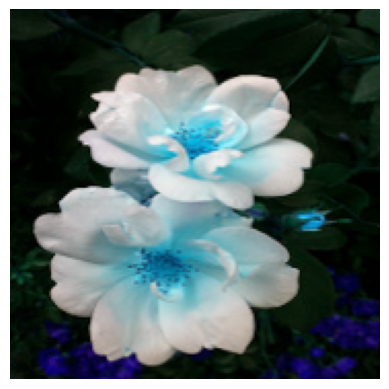

In [155]:
plt.axis('off')
plt.imshow(X[0])

In [157]:
y[0]

0

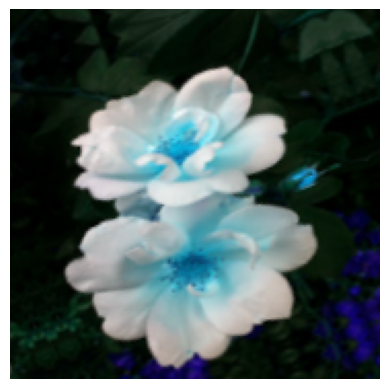

In [159]:
plt.axis('off')
plt.imshow(data_agumentation(X)[0].numpy().astype(int))

In [163]:
num_classes = 5

model = Sequential([
  data_agumentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)  

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 296ms/step - accuracy: 0.2696 - loss: 1.6340
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 339ms/step - accuracy: 0.5333 - loss: 1.1442
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 291ms/step - accuracy: 0.6044 - loss: 1.0192
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 309ms/step - accuracy: 0.6209 - loss: 0.9549
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 285ms/step - accuracy: 0.6518 - loss: 0.8774


In [164]:
 model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6103 - loss: 0.9389


[0.9263399243354797, 0.6230936646461487]